# 特征构建

In [1]:
#导入相关包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment',None) 
#不再弹出settingwithcopywarining警告
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
#导入数据
data = pd.read_excel('E://IT//毕设//result/data_five_first.xlsx')

In [3]:
data

,租金,面积(平方米),押金,判断押金,服务费,中介费,A地铁线,B地铁线,C地铁线,大区标签,...,采暖_标签,A付款方式标签,B付款方式标签,C付款方式标签,楼层标签,卧室,客厅,卫生间,大区英文,大区+街道
0,6700,60.00,13400,2,-1,0,9,7,1,3,...,1,1,-1,-1,1,2,1,1,C,C1
1,6400,80.48,12800,2,-1,0,11,1,-1,1,...,1,1,-1,-1,3,2,2,1,A,A1
2,2580,36.00,5160,2,-1,0,16,-1,-1,5,...,1,1,-1,-1,1,1,0,1,E,E1
3,5000,118.00,10000,2,0,-1,6,-1,-1,4,...,1,1,-1,-1,1,4,2,2,D,D1
4,2300,34.00,4600,2,0,-1,20,20,-1,1,...,1,1,-1,-1,1,1,0,1,A,A2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,2130,7.10,2130,1,213,0,1,-1,-1,8,...,1,2,1,1,1,3,1,1,H,H4
12865,1790,9.90,1790,1,179,0,11,1,-1,1,...,1,2,1,1,1,5,1,2,A,A1
12866,2130,12.50,2130,1,213,0,-1,-1,-1,8,...,1,2,1,1,3,3,1,1,H,H7
12867,3730,15.80,3730,1,373,0,1,-1,-1,8,...,1,2,1,-1,3,5,1,1,H,H7


In [4]:
#数据探索
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   租金       12869 non-null  int64  
 1   面积(平方米)  12869 non-null  float64
 2   押金       12869 non-null  int64  
 3   判断押金     12869 non-null  int64  
 4   服务费      12869 non-null  int64  
 5   中介费      12869 non-null  int64  
 6   A地铁线     12869 non-null  int64  
 7   B地铁线     12869 non-null  int64  
 8   C地铁线     12869 non-null  int64  
 9   大区标签     12869 non-null  int64  
 10  品牌标签     12869 non-null  int64  
 11  租赁方式标签   12869 non-null  int64  
 12  户型标签     12855 non-null  float64
 13  装修标签     12869 non-null  int64  
 14  朝向标签     12869 non-null  int64  
 15  电梯_标签    12869 non-null  int64  
 16  车位_标签    12869 non-null  int64  
 17  用水_标签    12869 non-null  int64  
 18  用电_标签    12869 non-null  int64  
 19  燃气_标签    12869 non-null  int64  
 20  采暖_标签    12869 non-null  int64  
 21  A付款方式标签  128

In [5]:
#数据列名
data.columns

Index(['租金', '面积(平方米)', '押金', '判断押金', '服务费', '中介费', 'A地铁线', 'B地铁线', 'C地铁线',
       '大区标签', '品牌标签', '租赁方式标签', '户型标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签',
       '用水_标签', '用电_标签', '燃气_标签', '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签',
       '楼层标签', '卧室', '客厅', '卫生间', '大区英文', '大区+街道'],
      dtype='object')

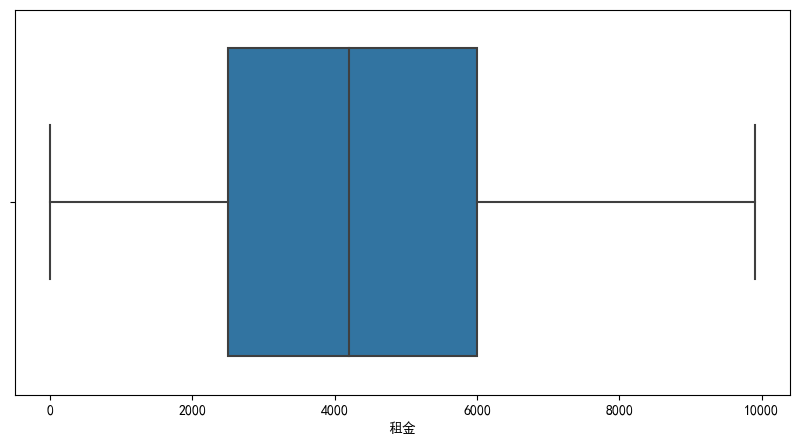

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x="租金",data=data,orient='h')
plt.show()

In [7]:
data_pd=pd.DataFrame(data)

## 构建房屋+客厅+卫生间新特征

### 构建房+卫+厅

In [8]:
data_pd["房+卫+厅"] = data_pd["卧室"] + data_pd["客厅"] + data_pd["卫生间"]

### 构建房/总

In [9]:
data_pd["房/总"] = data_pd["卧室"] / (data_pd["房+卫+厅"] + 0.01)

### 构建卫/总

In [10]:
data_pd["卫/总"] = data_pd["卫生间"] / (data_pd["房+卫+厅"] + 0.01)

### 构建厅/总

In [11]:
data_pd["厅/总"] = data_pd["客厅"] / (data_pd["房+卫+厅"] + 0.01)

### 构建卧室面积

In [12]:
data_pd['卧室面积'] = data_pd['面积(平方米)'] / (data_pd['卧室'] + 0.01)

### 构建户型

In [13]:
data_pd['户型'] = data_pd[['卧室', '客厅', '卫生间']].apply(lambda x: str(x['卧室']) + str(x['客厅']) + str(x['卫生间']), axis=1)


In [14]:
data_pd.head()

,租金,面积(平方米),押金,判断押金,服务费,中介费,A地铁线,B地铁线,C地铁线,大区标签,...,客厅,卫生间,大区英文,大区+街道,房+卫+厅,房/总,卫/总,厅/总,卧室面积,户型
0,6700,60.00,13400,2,-1,0,9,7,1,3,...,1,1,C,C1,4,0.498753,0.249377,0.249377,29.850746,211
1,6400,80.48,12800,2,-1,0,11,1,-1,1,...,2,1,A,A1,5,0.399202,0.199601,0.399202,40.039801,221
2,2580,36.00,5160,2,-1,0,16,-1,-1,5,...,0,1,E,E1,2,0.497512,0.497512,0.000000,35.643564,101
3,5000,118.00,10000,2,0,-1,6,-1,-1,4,...,2,2,D,D1,8,0.499376,0.249688,0.249688,29.426434,422
4,2300,34.00,4600,2,0,-1,20,20,-1,1,...,0,1,A,A2,2,0.497512,0.497512,0.000000,33.663366,101


### 构建是否有地铁

In [15]:
# #依次判断ABC 是否有无地铁，如果A地铁有，就跳出循环，就显示有地铁，否则继续判断，如果三者都无，那就判断为无地铁

# data_pd["是否地铁"] = (data_pd["A地铁线"] > -1) & (data_pd["B地铁线"] > -1) & (data_pd["C地铁线"] > -1)
# data_pd["是否地铁"] = data_pd["是否地铁"].astype(int)

In [16]:
# 添加新列"是否地铁"
data_pd["是否地铁"] = 0

# 遍历每一行数据
for index, row in data_pd.iterrows():
    # 如果A地铁线有地铁，标记为有地铁并跳出循环
    if row["A地铁线"] > -1:
        data_pd.at[index, "是否地铁"] = 1
        continue
    # 如果A地铁线没有地铁，继续判断B地铁线
    elif row["B地铁线"] > -1:
        data_pd.at[index, "是否地铁"] = 1
        continue
    # 如果A和B地铁线都没有地铁，判断C地铁线
    elif row["C地铁线"] > -1:
        data_pd.at[index, "是否地铁"] = 1

# 根据是否地铁列的值判断是否有地铁
# data_pd["是否地铁"] = data_pd["是否地铁"].map({0: "无地铁", 1: "有地铁"})


In [17]:
data_pd

,租金,面积(平方米),押金,判断押金,服务费,中介费,A地铁线,B地铁线,C地铁线,大区标签,...,卫生间,大区英文,大区+街道,房+卫+厅,房/总,卫/总,厅/总,卧室面积,户型,是否地铁
0,6700,60.00,13400,2,-1,0,9,7,1,3,...,1,C,C1,4,0.498753,0.249377,0.249377,29.850746,211,1
1,6400,80.48,12800,2,-1,0,11,1,-1,1,...,1,A,A1,5,0.399202,0.199601,0.399202,40.039801,221,1
2,2580,36.00,5160,2,-1,0,16,-1,-1,5,...,1,E,E1,2,0.497512,0.497512,0.000000,35.643564,101,1
3,5000,118.00,10000,2,0,-1,6,-1,-1,4,...,2,D,D1,8,0.499376,0.249688,0.249688,29.426434,422,1
4,2300,34.00,4600,2,0,-1,20,20,-1,1,...,1,A,A2,2,0.497512,0.497512,0.000000,33.663366,101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,2130,7.10,2130,1,213,0,1,-1,-1,8,...,1,H,H4,5,0.598802,0.199601,0.199601,2.358804,311,1
12865,1790,9.90,1790,1,179,0,11,1,-1,1,...,2,A,A1,8,0.624220,0.249688,0.124844,1.976048,512,1
12866,2130,12.50,2130,1,213,0,-1,-1,-1,8,...,1,H,H7,5,0.598802,0.199601,0.199601,4.152824,311,0
12867,3730,15.80,3730,1,373,0,1,-1,-1,8,...,1,H,H7,7,0.713267,0.142653,0.142653,3.153693,511,1


### 构建租金平均值特征

In [ ]:
#计算每个特征的租金平均值特征

In [18]:
data_pd.columns

Index(['租金', '面积(平方米)', '押金', '判断押金', '服务费', '中介费', 'A地铁线', 'B地铁线', 'C地铁线',
       '大区标签', '品牌标签', '租赁方式标签', '户型标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签',
       '用水_标签', '用电_标签', '燃气_标签', '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签',
       '楼层标签', '卧室', '客厅', '卫生间', '大区英文', '大区+街道', '房+卫+厅', '房/总', '卫/总',
       '厅/总', '卧室面积', '户型', '是否地铁'],
      dtype='object')

In [19]:
rent_means=data_pd[['大区+街道','朝向标签','A地铁线','大区英文','租金']].groupby(['大区+街道','朝向标签','A地铁线','大区英文'],as_index=False).mean()

rent_means.columns=['大区+街道','朝向标签','A地铁线','大区英文','平均值特征1']
data_pd=pd.merge(data_pd,rent_means,how='left',on=['大区+街道','朝向标签','A地铁线','大区英文'])

In [20]:
rent_means2=data_pd[['大区+街道','租金']].groupby(['大区+街道'],as_index=False).mean()

rent_means2.columns=['大区+街道','大区+街道平均值特征']
data_pd=pd.merge(data_pd,rent_means2,how='left',on=['大区+街道'])

In [21]:
rent_means3=data_pd[['朝向标签','租金']].groupby(['朝向标签'],as_index=False).mean()

rent_means3.columns=['朝向标签','朝向标签平均值特征']
data_pd=pd.merge(data_pd,rent_means3,how='left',on=['朝向标签'])

In [22]:
rent_means4=data_pd[['A地铁线','租金']].groupby(['A地铁线'],as_index=False).mean()

rent_means4.columns=['A地铁线','A地铁线平均值特征']
data_pd=pd.merge(data_pd,rent_means4,how='left',on=['A地铁线'])

In [23]:
rent_means5=data_pd[['大区英文','租金']].groupby(['大区英文'],as_index=False).mean()

rent_means5.columns=['大区英文','大区英文平均值特征']
data_pd=pd.merge(data_pd,rent_means5,how='left',on=['大区英文'])

In [24]:
data_pd

,租金,面积(平方米),押金,判断押金,服务费,中介费,A地铁线,B地铁线,C地铁线,大区标签,...,卫/总,厅/总,卧室面积,户型,是否地铁,平均值特征1,大区+街道平均值特征,朝向标签平均值特征,A地铁线平均值特征,大区英文平均值特征
0,6700,60.00,13400,2,-1,0,9,7,1,3,...,0.249377,0.249377,29.850746,211,1,5712.720000,5225.413534,4163.071070,4992.092732,4882.436364
1,6400,80.48,12800,2,-1,0,11,1,-1,1,...,0.199601,0.399202,40.039801,221,1,5998.750000,5229.564103,4524.850652,4779.522624,4494.741590
2,2580,36.00,5160,2,-1,0,16,-1,-1,5,...,0.497512,0.000000,35.643564,101,1,2634.666667,3707.724551,4216.757028,3843.047228,4035.890179
3,5000,118.00,10000,2,0,-1,6,-1,-1,4,...,0.249688,0.249688,29.426434,422,1,5048.131868,4953.176282,4525.573000,4597.347368,4466.491597
4,2300,34.00,4600,2,0,-1,20,20,-1,1,...,0.497512,0.000000,33.663366,101,1,2735.000000,4020.554656,4216.757028,3262.638298,4494.741590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,2130,7.10,2130,1,213,0,1,-1,-1,8,...,0.199601,0.199601,2.358804,311,1,2521.500000,4256.041841,4163.071070,4284.043103,4349.275755
12865,1790,9.90,1790,1,179,0,11,1,-1,1,...,0.249688,0.124844,1.976048,512,1,3568.333333,5229.564103,4475.708333,4779.522624,4494.741590
12866,2130,12.50,2130,1,213,0,-1,-1,-1,8,...,0.199601,0.199601,4.152824,311,0,4981.000000,3615.909756,3984.905376,4273.643694,4349.275755
12867,3730,15.80,3730,1,373,0,1,-1,-1,8,...,0.142653,0.142653,3.153693,511,1,3162.857143,3615.909756,4216.757028,4284.043103,4349.275755


### 构造聚类特征

#### 硬性条件 面积+户型+楼层+交通

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 选择需要聚类的特征列
features = data_pd[['面积(平方米)', '卧室', '客厅', '卫生间', '楼层标签', '是否地铁']]

# 特征标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=6)  # 选择聚类的类别数
kmeans.fit(scaled_features)

# 将聚类结果添加到数据集中
data_pd['房屋配置聚类标签'] = kmeans.labels_.astype(str)


In [32]:
#计算每个聚类特征的月租金平均值
cluster_means=data_pd[['房屋配置聚类标签','租金']].groupby('房屋配置聚类标签',as_index=False).mean()

cluster_means.columns=['房屋配置聚类标签','平均值特征2']
data_pd=pd.merge(data_pd,cluster_means,how='left',on=['房屋配置聚类标签'])

In [33]:
data_pd

,租金,面积(平方米),押金,判断押金,服务费,中介费,A地铁线,B地铁线,C地铁线,大区标签,...,卧室面积,户型,是否地铁,平均值特征1,大区+街道平均值特征,朝向标签平均值特征,A地铁线平均值特征,大区英文平均值特征,房屋配置聚类标签,平均值特征2
0,6700,60.00,13400,2,-1,0,9,7,1,3,...,29.850746,211,1,5712.720000,5225.413534,4163.071070,4992.092732,4882.436364,2,4414.579365
1,6400,80.48,12800,2,-1,0,11,1,-1,1,...,40.039801,221,1,5998.750000,5229.564103,4524.850652,4779.522624,4494.741590,4,5145.811146
2,2580,36.00,5160,2,-1,0,16,-1,-1,5,...,35.643564,101,1,2634.666667,3707.724551,4216.757028,3843.047228,4035.890179,2,4414.579365
3,5000,118.00,10000,2,0,-1,6,-1,-1,4,...,29.426434,422,1,5048.131868,4953.176282,4525.573000,4597.347368,4466.491597,1,4699.096813
4,2300,34.00,4600,2,0,-1,20,20,-1,1,...,33.663366,101,1,2735.000000,4020.554656,4216.757028,3262.638298,4494.741590,2,4414.579365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,2130,7.10,2130,1,213,0,1,-1,-1,8,...,2.358804,311,1,2521.500000,4256.041841,4163.071070,4284.043103,4349.275755,0,2884.903469
12865,1790,9.90,1790,1,179,0,11,1,-1,1,...,1.976048,512,1,3568.333333,5229.564103,4475.708333,4779.522624,4494.741590,0,2884.903469
12866,2130,12.50,2130,1,213,0,-1,-1,-1,8,...,4.152824,311,0,4981.000000,3615.909756,3984.905376,4273.643694,4349.275755,3,4479.349257
12867,3730,15.80,3730,1,373,0,1,-1,-1,8,...,3.153693,511,1,3162.857143,3615.909756,4216.757028,4284.043103,4349.275755,0,2884.903469


#### 房屋装修+大区+面积+户型

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 选择需要聚类的特征列
features = data_pd[['大区标签', '装修标签', '面积(平方米)', '房+卫+厅']]

# 特征标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=4)  # 选择聚类的类别数
kmeans.fit(scaled_features)

# 将聚类结果添加到数据集中
data_pd['房屋装修聚类标签'] = kmeans.labels_.astype(str)


In [37]:
#计算每个聚类特征的月租金平均值
cluster_means=data_pd[['房屋装修聚类标签','租金']].groupby('房屋装修聚类标签',as_index=False).mean()

cluster_means.columns=['房屋装修聚类标签','平均值特征3']
data_pd=pd.merge(data_pd,cluster_means,how='left',on=['房屋装修聚类标签'])

#### 押金+服务费用+中介费+租赁方式标签+

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 选择需要聚类的特征列
features = data_pd[['押金', '服务费', '中介费', '租赁方式标签']]

# 特征标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=4)  # 选择聚类的类别数
kmeans.fit(scaled_features)

# 将聚类结果添加到数据集中
data_pd['房屋费用聚类标签'] = kmeans.labels_.astype(str)


In [42]:
#计算每个聚类特征的月租金平均值
cluster_means=data_pd[['房屋费用聚类标签','租金']].groupby('房屋费用聚类标签',as_index=False).mean()

cluster_means.columns=['房屋费用聚类标签','平均值特征4']
data_pd=pd.merge(data_pd,cluster_means,how='left',on=['房屋费用聚类标签'])

#### 电梯标签+车位标签+用水标签+用电标签+燃气标签+采暖标签+地铁

In [45]:
data_pd.columns

Index(['租金', '面积(平方米)', '押金', '判断押金', '服务费', '中介费', 'A地铁线', 'B地铁线', 'C地铁线',
       '大区标签', '品牌标签', '租赁方式标签', '户型标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签',
       '用水_标签', '用电_标签', '燃气_标签', '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签',
       '楼层标签', '卧室', '客厅', '卫生间', '大区英文', '大区+街道', '房+卫+厅', '房/总', '卫/总',
       '厅/总', '卧室面积', '户型', '是否地铁', '平均值特征1', '大区+街道平均值特征', '朝向标签平均值特征',
       'A地铁线平均值特征', '大区英文平均值特征', '房屋配置聚类标签', '平均值特征2', '房屋装修聚类标签', '平均值特征3',
       '房屋费用聚类标签', '平均值特征4'],
      dtype='object')

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 选择需要聚类的特征列
features = data_pd[['电梯_标签', '车位_标签', '用水_标签', '用电_标签' ,'燃气_标签', '采暖_标签','是否地铁']]

# 特征标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=5)  # 选择聚类的类别数
kmeans.fit(scaled_features)

# 将聚类结果添加到数据集中
data_pd['房屋便利聚类标签'] = kmeans.labels_.astype(str)


In [47]:
#计算每个聚类特征的月租金平均值
cluster_means=data_pd[['房屋便利聚类标签','租金']].groupby('房屋便利聚类标签',as_index=False).mean()

cluster_means.columns=['房屋便利聚类标签','平均值特征5']
data_pd=pd.merge(data_pd,cluster_means,how='left',on=['房屋便利聚类标签'])

In [49]:
data_pd

,租金,面积(平方米),押金,判断押金,服务费,中介费,A地铁线,B地铁线,C地铁线,大区标签,...,A地铁线平均值特征,大区英文平均值特征,房屋配置聚类标签,平均值特征2,房屋装修聚类标签,平均值特征3,房屋费用聚类标签,平均值特征4,房屋便利聚类标签,平均值特征5
0,6700,60.00,13400,2,-1,0,9,7,1,3,...,4992.092732,4882.436364,2,4414.579365,2,4351.671456,2,5000.154891,0,4586.337664
1,6400,80.48,12800,2,-1,0,11,1,-1,1,...,4779.522624,4494.741590,4,5145.811146,0,4513.637500,2,5000.154891,0,4586.337664
2,2580,36.00,5160,2,-1,0,16,-1,-1,5,...,3843.047228,4035.890179,2,4414.579365,0,4513.637500,2,5000.154891,0,4586.337664
3,5000,118.00,10000,2,0,-1,6,-1,-1,4,...,4597.347368,4466.491597,1,4699.096813,1,4260.068896,0,4703.166293,0,4586.337664
4,2300,34.00,4600,2,0,-1,20,20,-1,1,...,3262.638298,4494.741590,2,4414.579365,0,4513.637500,0,4703.166293,0,4586.337664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,2130,7.10,2130,1,213,0,1,-1,-1,8,...,4284.043103,4349.275755,0,2884.903469,3,4536.882353,1,2114.365819,0,4586.337664
12865,1790,9.90,1790,1,179,0,11,1,-1,1,...,4779.522624,4494.741590,0,2884.903469,0,4513.637500,1,2114.365819,0,4586.337664
12866,2130,12.50,2130,1,213,0,-1,-1,-1,8,...,4273.643694,4349.275755,3,4479.349257,3,4536.882353,1,2114.365819,4,4359.203845
12867,3730,15.80,3730,1,373,0,1,-1,-1,8,...,4284.043103,4349.275755,0,2884.903469,3,4536.882353,1,2114.365819,0,4586.337664


In [51]:
data_pd.to_excel("E:\\IT\\毕设\\result\\data_six.xlsx",index=False)

### 保存标准化和聚类模型

In [48]:
import pickle 
with open("E:\IT\毕设\code\kmeans.pkl",'wb') as f:
    pickle.dump({
        "std_transer":scaler,
        "kmeans":kmeans
    },f)

## 特征相关性

In [37]:
# 特征和目标相关性分析

In [3]:
#导入相关包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment',None) 
#不再弹出settingwithcopywarining警告
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
data_twelve=pd.read_excel("E://IT//毕设//result/data_twelve.xlsx")
data_twelve.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12869 entries, 0 to 12868
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   租金            12869 non-null  int64  
 1   面积(平方米)       12869 non-null  float64
 2   服务费           12869 non-null  float64
 3   A地铁线          12869 non-null  int64  
 4   B地铁线          12869 non-null  int64  
 5   C地铁线          12869 non-null  int64  
 6   大区标签          12869 non-null  int64  
 7   品牌标签          12869 non-null  int64  
 8   租赁方式标签        12869 non-null  int64  
 9   装修标签          12869 non-null  int64  
 10  朝向标签          12869 non-null  int64  
 11  电梯_标签         12869 non-null  int64  
 12  车位_标签         12869 non-null  int64  
 13  用水_标签         12869 non-null  int64  
 14  用电_标签         12869 non-null  int64  
 15  燃气_标签         12869 non-null  int64  
 16  采暖_标签         12869 non-null  int64  
 17  A付款方式标签       12869 non-null  int64  
 18  B付款方式标签       12869 non-nu

In [5]:
data_twelve.head

<bound method NDFrame.head of          租金  面积(平方米)    服务费  A地铁线  B地铁线  C地铁线  大区标签  品牌标签  租赁方式标签  装修标签  ...  \
0      6700    60.00  670.0     9     7     1     3     1       1     1  ...   
1      6400    80.48  640.0    11     1    -1     1     1       1     2  ...   
2      2580    36.00  258.0    16    -1    -1     5     1       1     2  ...   
3      5000   118.00    0.0     6    -1    -1     4     2       1     2  ...   
4      2300    34.00    0.0    20    20    -1     1     2       1     2  ...   
...     ...      ...    ...   ...   ...   ...   ...   ...     ...   ...  ...   
12864  2130     7.10  213.0     1    -1    -1     8     3       2     2  ...   
12865  1790     9.90  179.0    11     1    -1     1     3       2     2  ...   
12866  2130    12.50  213.0    -1    -1    -1     8     3       2     2  ...   
12867  3730    15.80  373.0     1    -1    -1     8     3       2     2  ...   
12868  2760    28.04  276.0     2     2    -1     8     3       2     2  ...   

         

C:\Users\Chc\.conda\envs\tipdm\lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


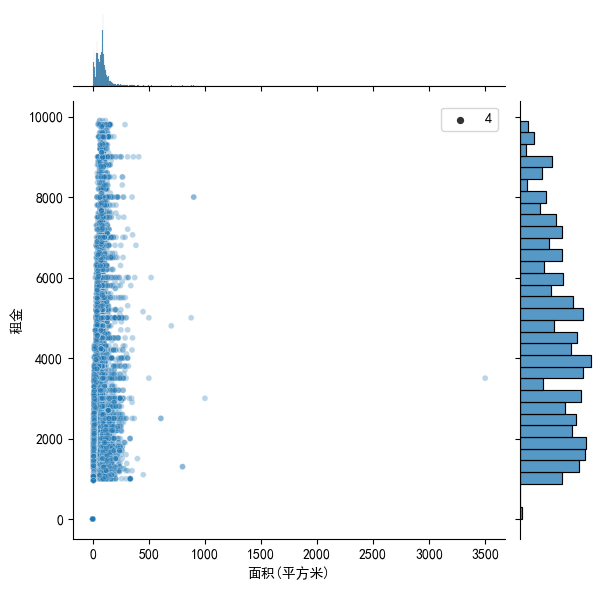

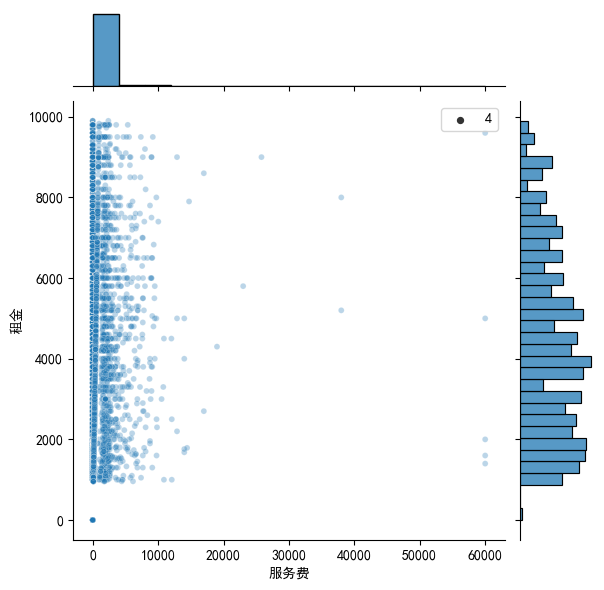

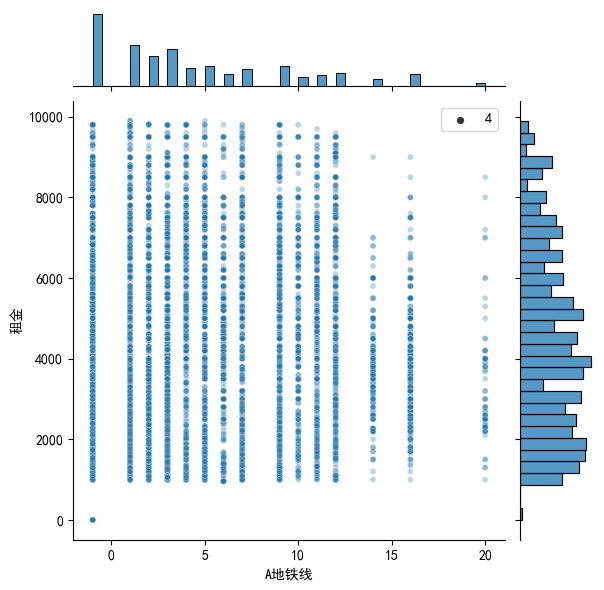

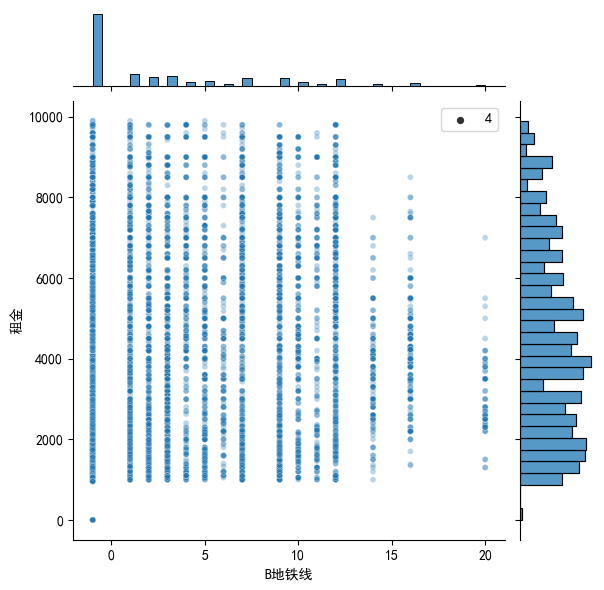

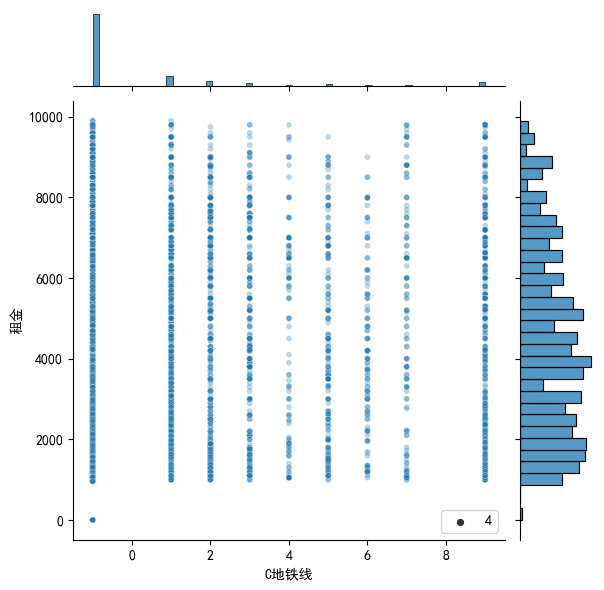

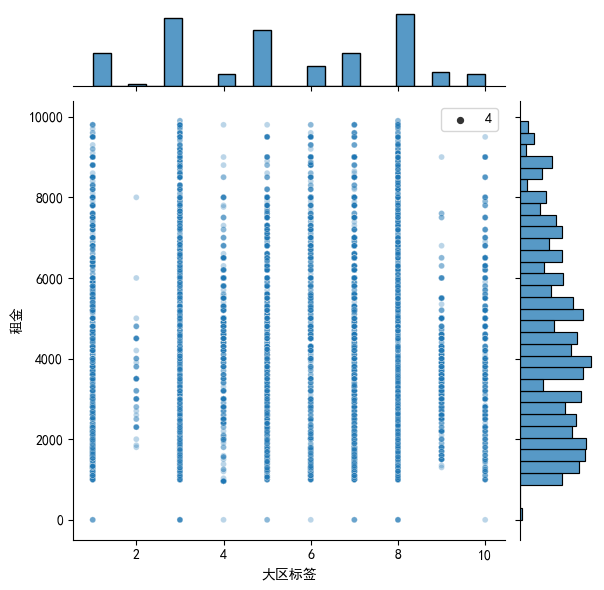

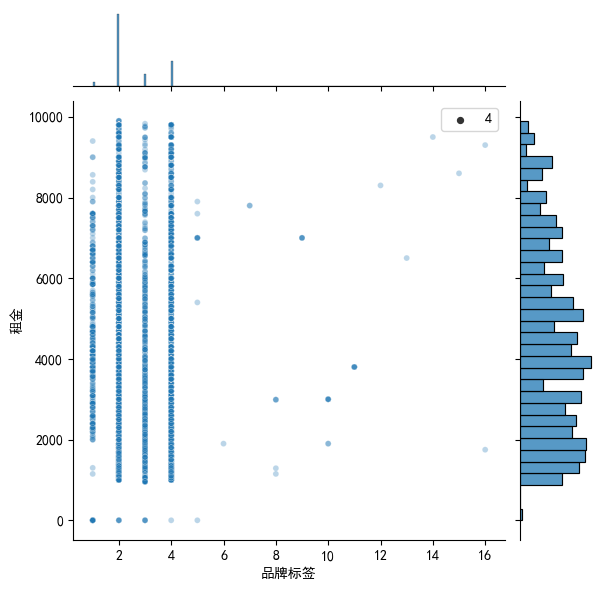

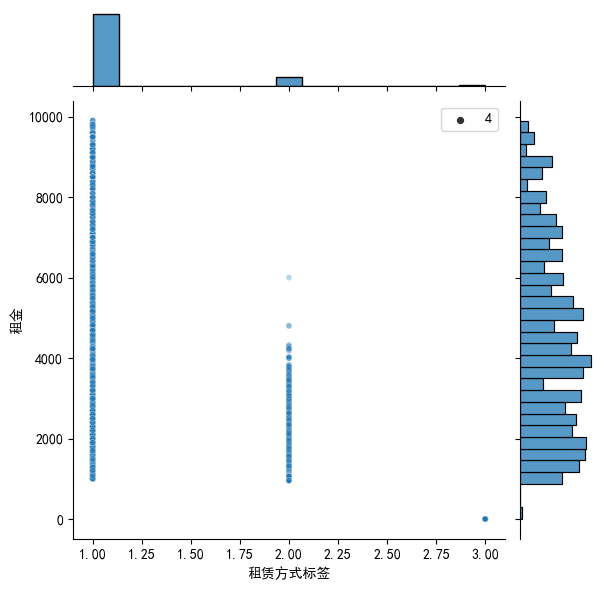

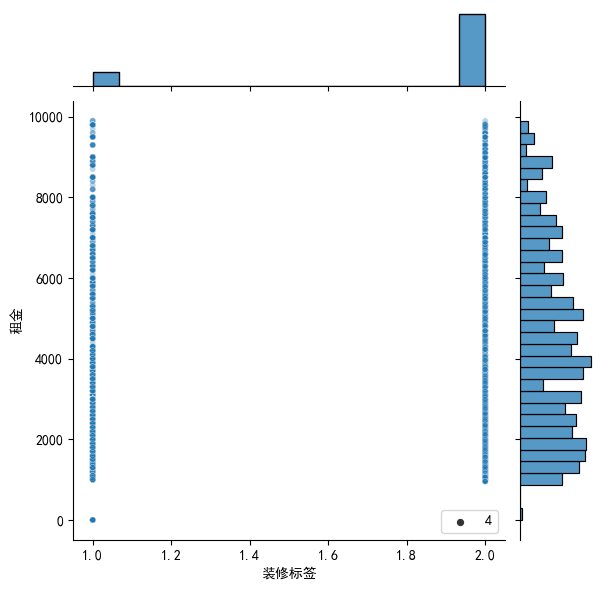

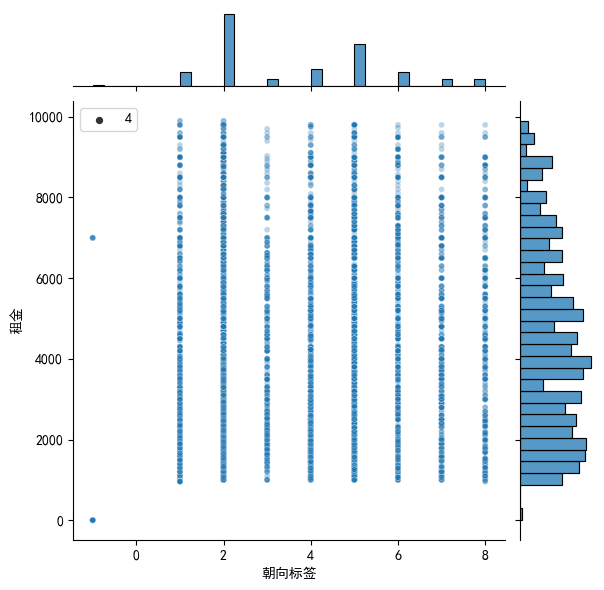

Error in callback <function flush_figures at 0x000002E98C60D2D0> (for post_execute):


KeyboardInterrupt: 

In [14]:
#通过散点图观察特征和目标值之间的关系
continuous_cols=['面积(平方米)', '服务费', 'A地铁线', 'B地铁线', 'C地铁线', '大区标签', '品牌标签',
       '租赁方式标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签', '用水_标签', '用电_标签', '燃气_标签',
       '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签', '楼层标签', '卧室', '客厅', '卫生间',
        '卧室面积', '户型', '小区_标签']
for col in continuous_cols:
    sns.jointplot(x=col,y='租金',data=data_twelve,alpha=0.3,size=4)

In [17]:
data_twelve.columns

Index(['租金', '面积(平方米)', '服务费', 'A地铁线', 'B地铁线', 'C地铁线', '大区标签', '品牌标签',
       '租赁方式标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签', '用水_标签', '用电_标签', '燃气_标签',
       '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签', '楼层标签', '卧室', '客厅', '卫生间',
       '房+卫+厅', '房/总', '卫/总', '厅/总', '卧室面积', '户型', '是否地铁', '平均值特征1',
       '大区+街道平均值特征', '朝向标签平均值特征', 'A地铁线平均值特征', '大区英文平均值特征', '房屋配置聚类平均值特征2',
       '房屋装修聚类平均值特征3', '房屋费用聚类平均值特征4', '房屋便利聚类平均值特征5', '小区_标签'],
      dtype='object')

### 皮尔逊系数

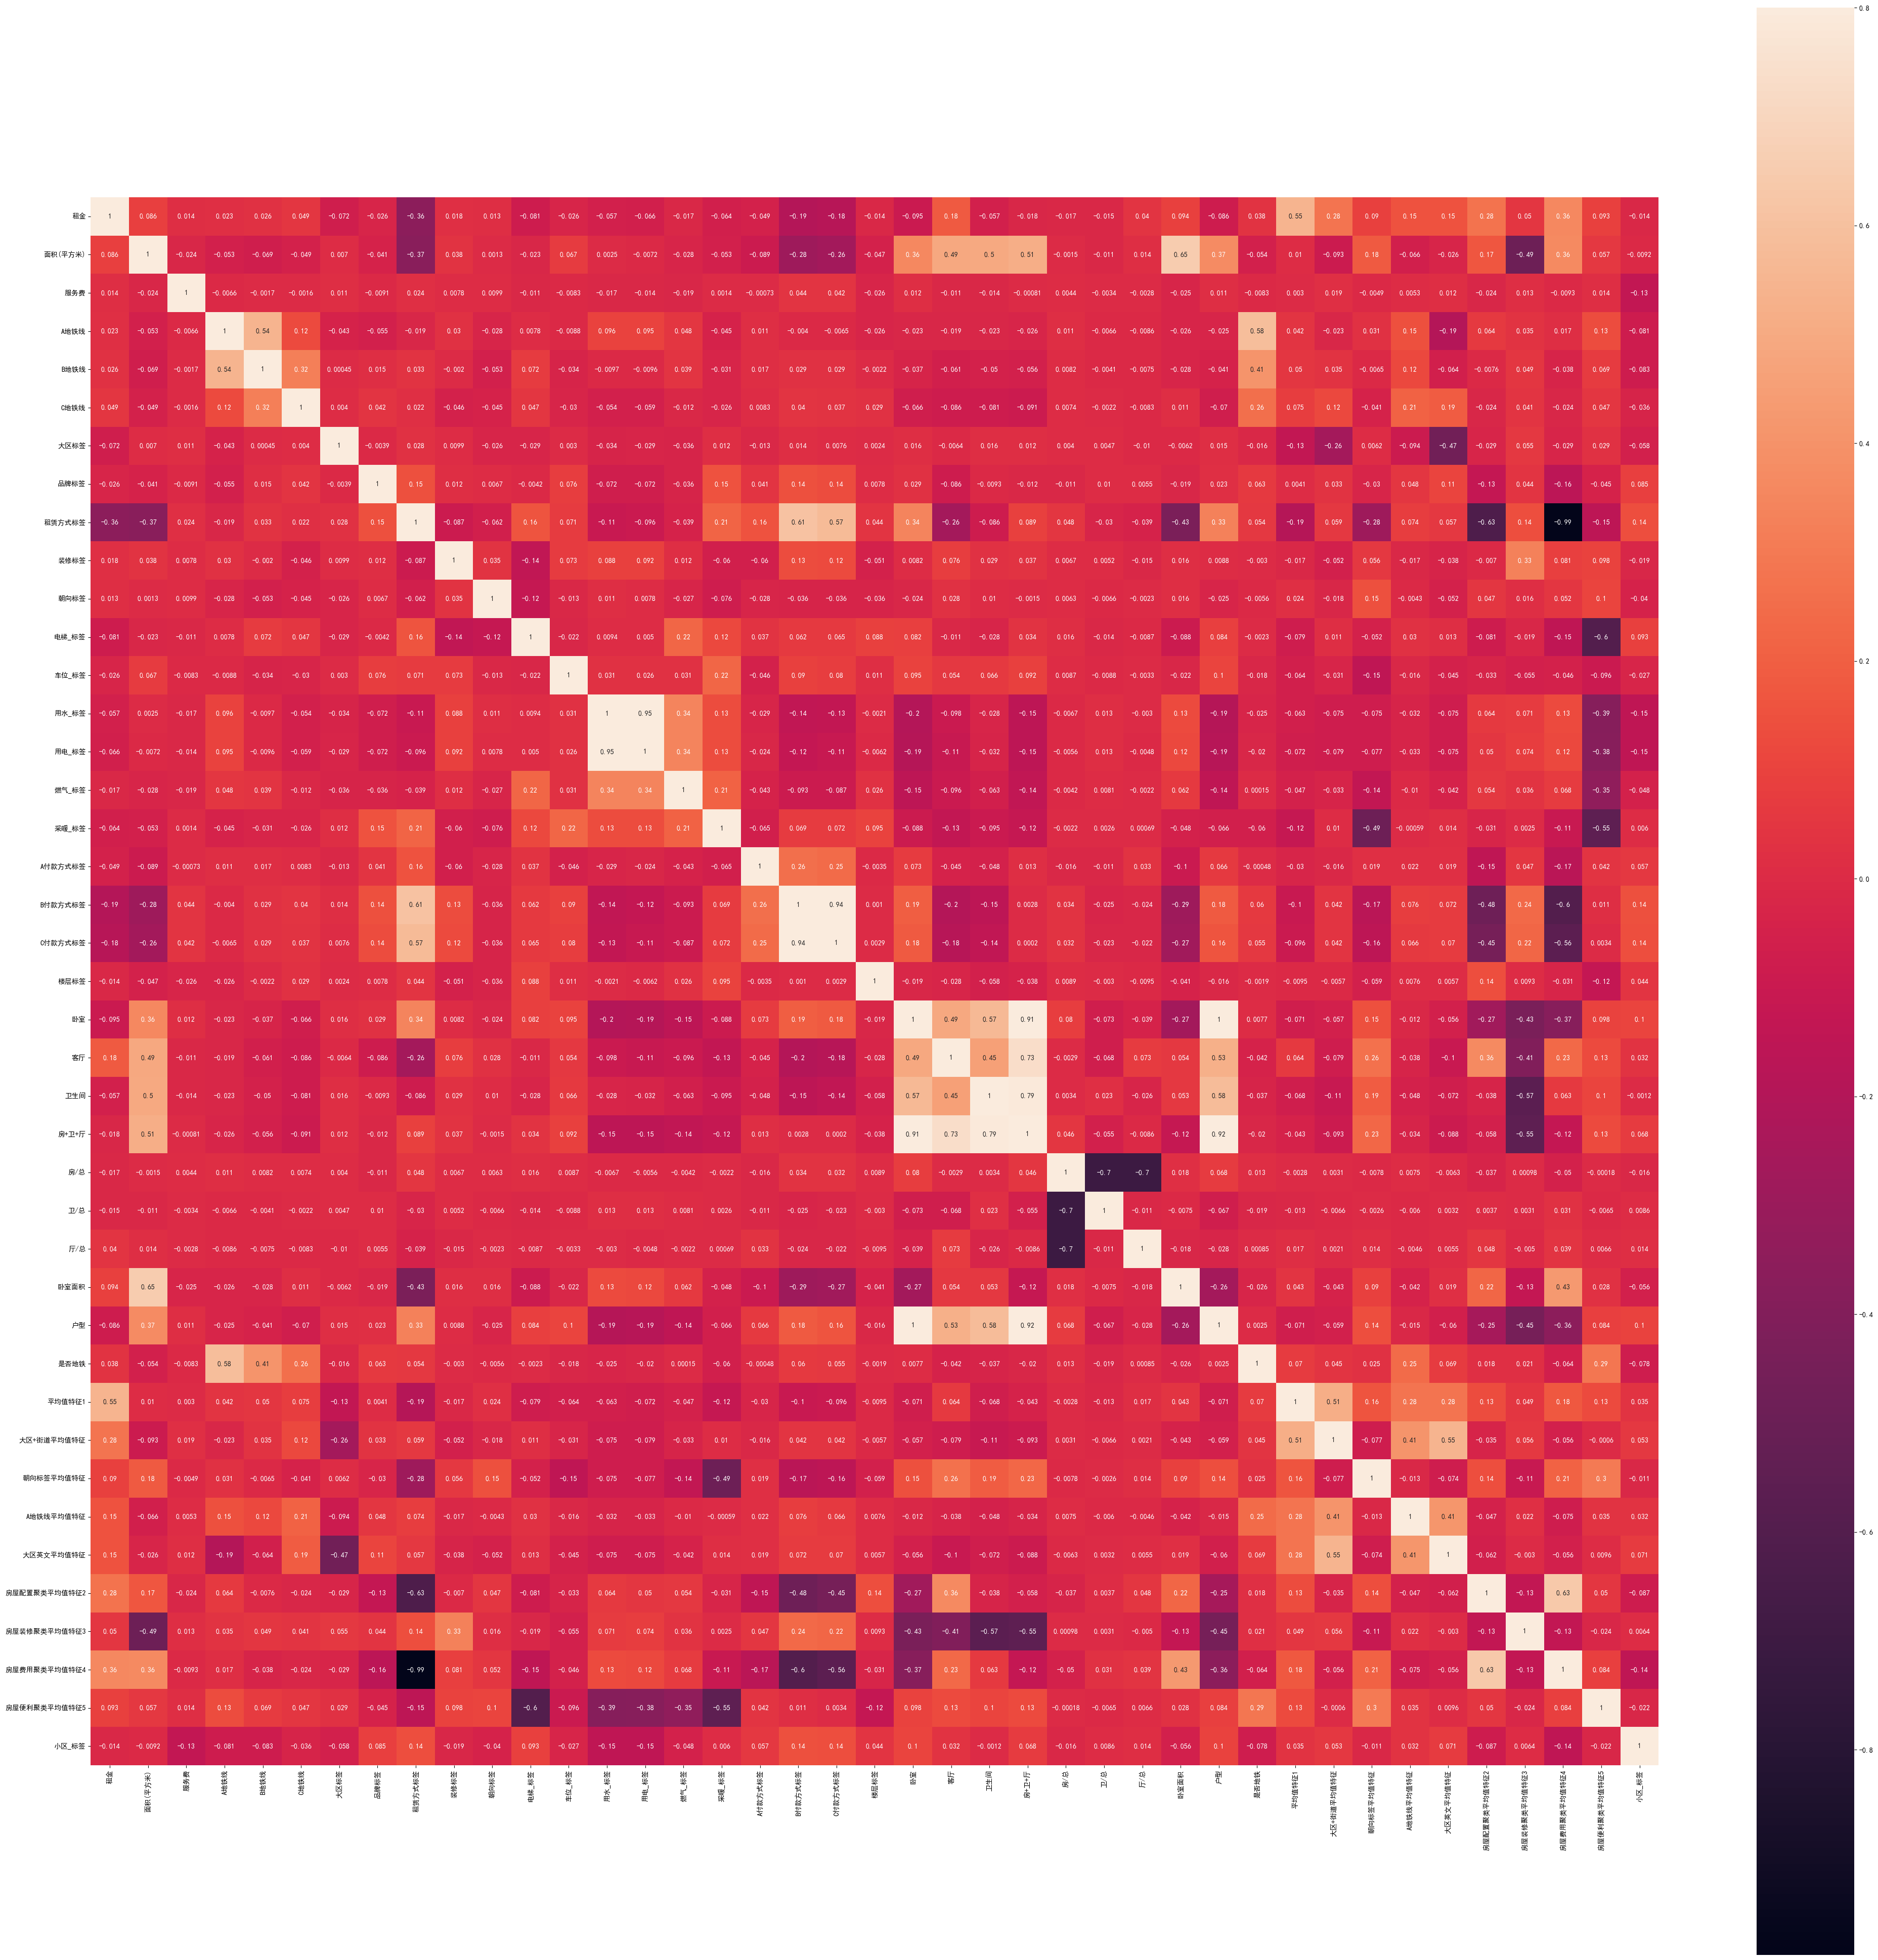

In [32]:
columns=['面积(平方米)', '服务费', 'A地铁线', 'B地铁线', 'C地铁线', '大区标签', '品牌标签',
       '租赁方式标签', '装修标签', '朝向标签', '电梯_标签', '车位_标签', '用水_标签', '用电_标签', '燃气_标签',
       '采暖_标签', 'A付款方式标签', 'B付款方式标签', 'C付款方式标签', '楼层标签', '卧室', '客厅', '卫生间',
        '卧室面积', '户型' '小区_标签']
corrmat = data_twelve.corr()#计算皮尔森相关性
plt.figure(figsize=(50,50))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

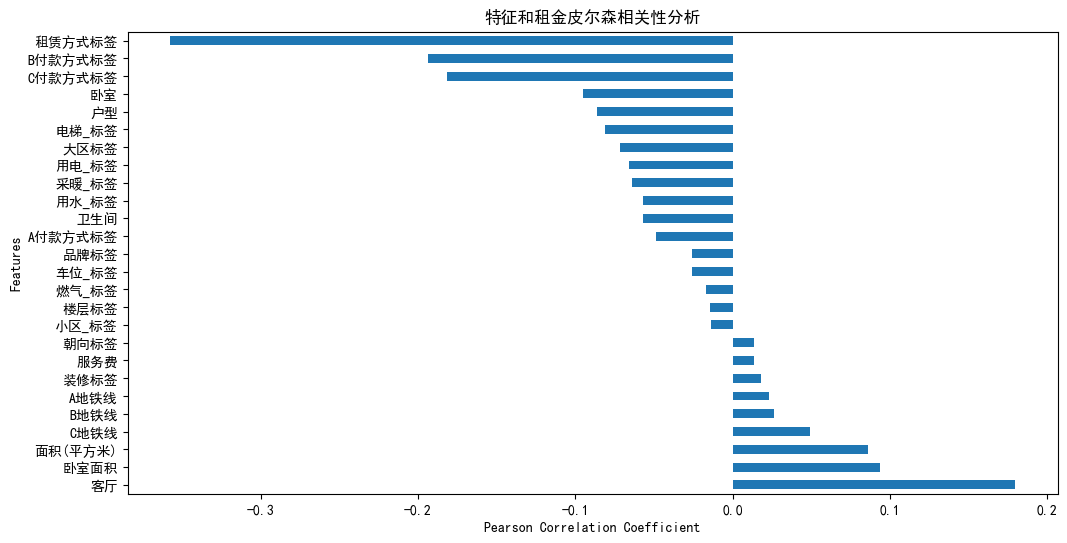

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
data_twelve.corr()['租金'][continuous_cols].sort_values(ascending=False).plot(kind='barh', title='特征和租金皮尔森相关性分析')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.show()


###  斯皮尔曼相关

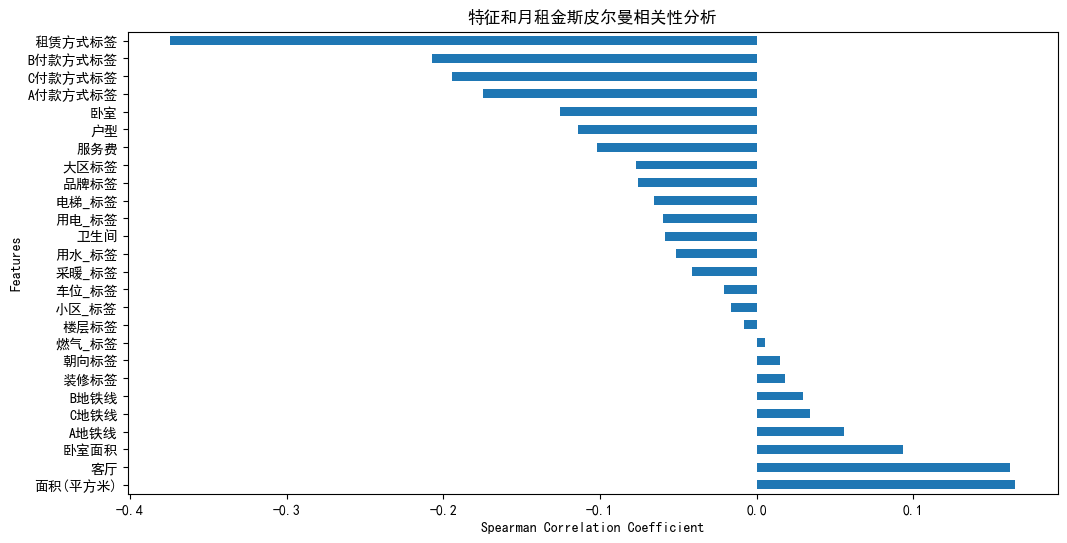

In [35]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import pandas as pd

rs = []
for key in continuous_cols:
    r, p = spearmanr(data_twelve[key], data_twelve['租金'])  # 计算特征与目标值之间的斯皮尔曼相关性
    rs.append(r)
rs = pd.Series(data=rs, index=continuous_cols).dropna()
rs.sort_values(ascending=False).plot(kind='barh', figsize=(12, 6))
plt.title('特征和月租金斯皮尔曼相关性分析')
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Features')
plt.show()


### 互信息度

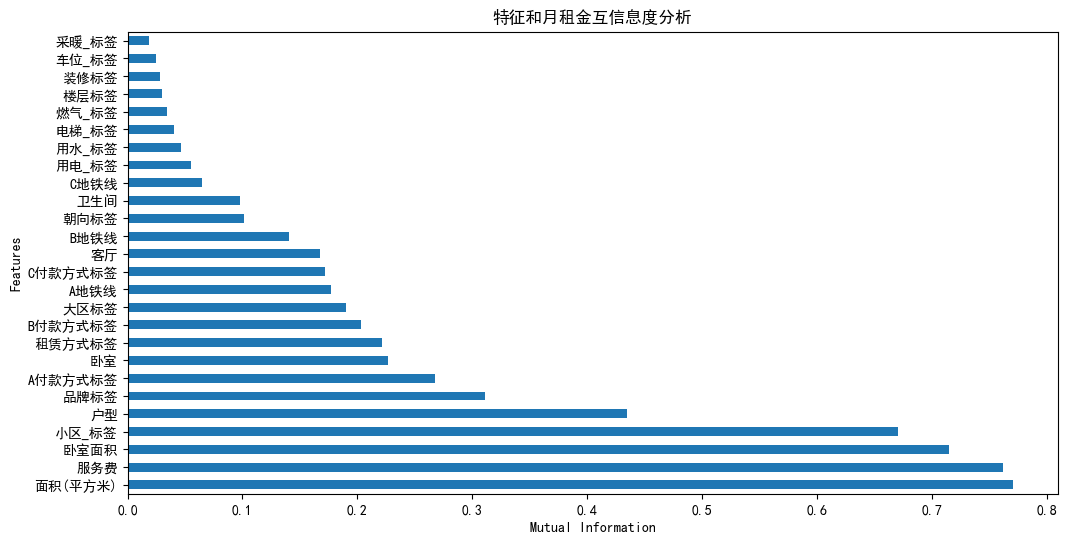

In [36]:
from sklearn.feature_selection import mutual_info_regression

# 假设X是特征，y是目标变量
X = data_twelve[continuous_cols]  # 特征
y = data_twelve['租金']  # 目标变量

# 计算特征和目标变量之间的互信息度
mi = mutual_info_regression(X, y)

# 将互信息度值与特征名对应起来
mi_series = pd.Series(mi, index=continuous_cols)

# 绘制互信息度的条形图
mi_series.sort_values(ascending=False).plot(kind='barh', figsize=(12, 6))
plt.title('特征和月租金互信息度分析')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()


## 异常值分析

In [25]:
def plot_reg(xs,y,data,cols=1):
    n=len(xs)
    for i in range(n):
        plt.figure(figsize=(10,10))
        sns.regplot(x=data[xs[i]],y=data[y])
        plt.show()

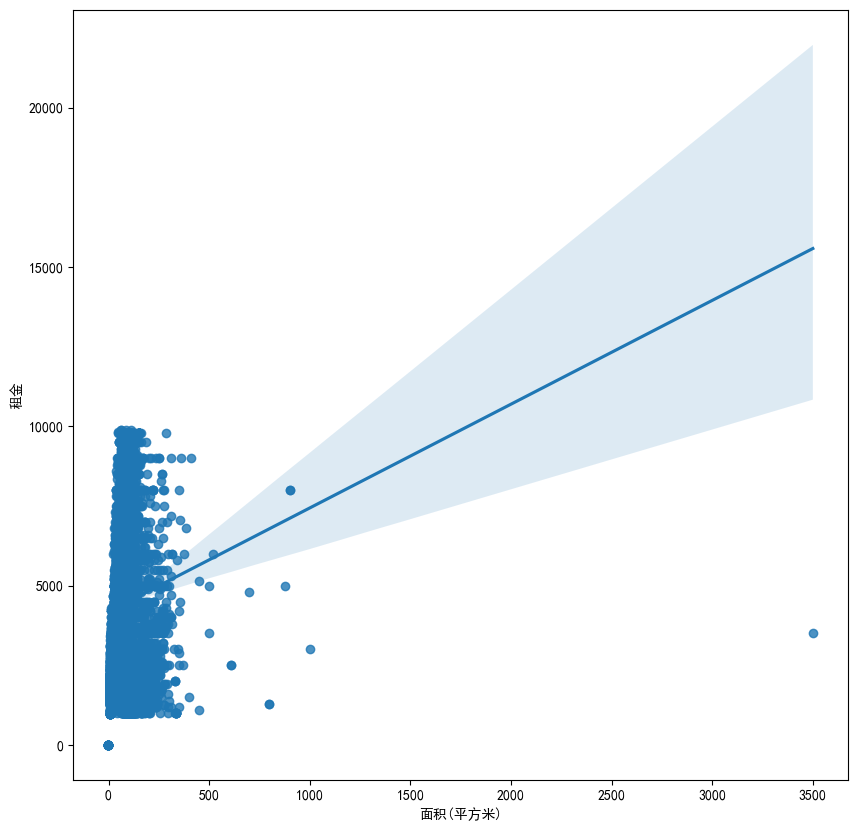

In [26]:
reg_cols=['面积(平方米)']
plot_reg(reg_cols,"租金",data_twelve)

In [ ]:
## 小区名过多的问题

In [27]:
neighbors=data_twelve['小区_标签'].value_counts()

In [28]:
neighbors

小区_标签
27      83
5       70
265     51
396     46
37      43
        ..
1900     1
1902     1
1905     1
1906     1
2715     1
Name: count, Length: 2715, dtype: int64

In [29]:
#观察条目数超过50的小区有多少
(neighbors>50).sum()

3

In [30]:
#观察条目数超过100的小区有多少
(neighbors>100).sum()

0